In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [ ]:
# load the data into a pandas dataframe

data_path = '/content/airbnb_listings_austin-1.csv'
cluster_df = pd.read_csv(data_path)

# preview data
cluster_df.info()
cluster_df.head
print(cluster_df)

# total count of NaN values
print(cluster_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2410 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

In [ ]:
#Dropped Columns with more than 20% missing data
cluster_df.drop(columns = ['space', 'neighborhood_overview', 'notes', 'transit' , 'host_about', 'host_response_time', 'host_response_rate',
                            'square_feet', 'weekly_price', 'security_deposit', 'cleaning_fee'], inplace = True)
#keeping review scores and then dropping null values
#'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
#'review_scores_communication', 'review_scores_location', 'review_scores_value'

#Dropping irrelevant columns for accomplishing business problems and did not have numerical values
cluster_df.drop(columns = ['host_id', 'host_name', 'host_since',
       'host_location', 'host_is_superhost','experiences_offered',
       'host_has_profile_pic', 'id', 'neighbourhood','listing_url',
       'name', 'summary', 'description',  'has_availability',
       'amenities', 'city', 'number_of_reviews'], inplace = True)

cluster_df['price'] = cluster_df['price'].str.replace('$', '').str.replace(',', '').astype(float)
cluster_df['extra_people'] = cluster_df['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)
# drop null values

cluster_df = cluster_df.dropna()
cluster_df = pd.get_dummies(cluster_df, columns=['room_type','property_type','host_identity_verified',
                                                  'bed_type', 'instant_bookable', 'cancellation_policy'])

cluster_df.info()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 5832
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_listings_count                  3733 non-null   float64
 1   accommodates                         3733 non-null   int64  
 2   bathrooms                            3733 non-null   float64
 3   bedrooms                             3733 non-null   float64
 4   beds                                 3733 non-null   float64
 5   price                                3733 non-null   float64
 6   guests_included                      3733 non-null   int64  
 7   extra_people                         3733 non-null   float64
 8   minimum_nights                       3733 non-null   int64  
 9   availability_30                      3733 non-null   int64  
 10  availability_60                      3733 non-null   int64  
 11  availability_90                    

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,availability_30,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,1.0,6,2.5,1.0,3.0,300.0,1,0.0,2,0,...,False,False,True,True,False,False,True,False,False,False
7,1.0,2,1.0,1.0,1.0,40.0,2,10.0,1,16,...,False,False,True,False,True,False,True,False,False,False
9,1.0,2,1.0,1.0,1.0,44.0,2,19.0,1,29,...,False,False,True,True,False,False,True,False,False,False
11,1.0,2,1.0,1.0,1.0,50.0,1,10.0,3,24,...,False,False,True,True,False,False,False,False,True,False
12,9.0,2,1.0,1.0,1.0,49.0,1,0.0,2,25,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
#Standardize Data
dfcolumns = cluster_df.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(cluster_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,availability_30,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30
0,-0.217756,0.567571,1.498361,-0.622186,0.439210,0.299713,-0.572717,-0.523358,-0.018196,-1.448045,...,-0.121152,-0.065609,0.190706,0.351258,-0.351258,-0.585084,1.673746,-0.016369,-0.959821,-0.046343
1,-0.217756,-0.880894,-0.612349,-0.622186,-0.734006,-0.722120,-0.036352,-0.179355,-0.167810,-0.041219,...,-0.121152,-0.065609,0.190706,-2.846907,2.846907,-0.585084,1.673746,-0.016369,-0.959821,-0.046343
2,-0.217756,-0.880894,-0.612349,-0.622186,-0.734006,-0.706400,-0.036352,0.130247,-0.167810,1.101827,...,-0.121152,-0.065609,0.190706,0.351258,-0.351258,-0.585084,1.673746,-0.016369,-0.959821,-0.046343
3,-0.217756,-0.880894,-0.612349,-0.622186,-0.734006,-0.682819,-0.572717,-0.179355,0.131418,0.662194,...,-0.121152,-0.065609,0.190706,0.351258,-0.351258,-0.585084,-0.597462,-0.016369,1.041861,-0.046343
4,-0.089753,-0.880894,-0.612349,-0.622186,-0.734006,-0.686749,-0.572717,-0.523358,-0.018196,0.750120,...,-0.121152,-0.065609,0.190706,0.351258,-0.351258,-0.585084,-0.597462,-0.016369,1.041861,-0.046343


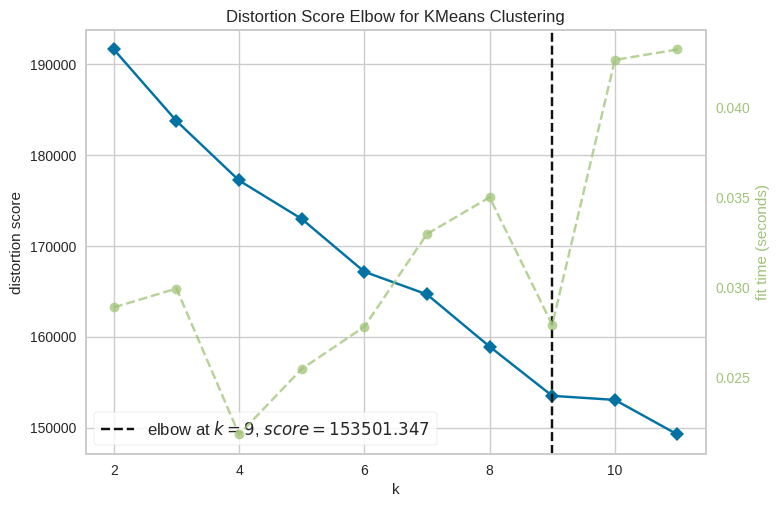

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

#Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [ ]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
cluster_df['cluster']=clusters

cluster_df.info()

# Evaluate cluster sizes to insure that they are similar
print(cluster_df['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = cluster_df.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)

<class 'pandas.core.frame.DataFrame'>
Index: 3733 entries, 0 to 5832
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_listings_count                  3733 non-null   float64
 1   accommodates                         3733 non-null   int64  
 2   bathrooms                            3733 non-null   float64
 3   bedrooms                             3733 non-null   float64
 4   beds                                 3733 non-null   float64
 5   price                                3733 non-null   float64
 6   guests_included                      3733 non-null   int64  
 7   extra_people                         3733 non-null   float64
 8   minimum_nights                       3733 non-null   int64  
 9   availability_30                      3733 non-null   int64  
 10  availability_60                      3733 non-null   int64  
 11  availability_90                    